<a href="https://colab.research.google.com/github/elissandroa/MachineLiearningSpecialist-DIO/blob/main/Lab6_Cats_v_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [15]:
!wget --no-check-certificate \
"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
-O "/tmp/cats-and-dogs.zip"
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2023-08-18 21:25:40--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.33.137.47, 2600:1402:1400:289::317f, 2600:1402:1400:28d::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.33.137.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M  81.1MB/s    in 11s     

2023-08-18 21:25:51 (74.3 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [16]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

#Expected Output:
#12501
#12501

12501
12501


In [17]:
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass


In [18]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + "is zero length, so ignoring.")
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpgis zero length, so ignoring.
11702.jpgis zero length, so ignoring.


In [19]:
print(len(os.listdir("/tmp/cats-v-dogs/training/cats/")))
print(len(os.listdir("/tmp/cats-v-dogs/training/dogs/")))
print(len(os.listdir("/tmp/cats-v-dogs/testing/cats/")))
print(len(os.listdir("/tmp/cats-v-dogs/testing/dogs/")))

12500
12499
4256
4280


In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [27]:
from tensorflow.python.ops.variables import validate_synchronization_aggregation_trainable
TRAINING_DIR = '/tmp/cats-v-dogs/training/'
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150,150))

VALIDATION_DIR = '/tmp/cats-v-dogs/testing/'
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validate_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                            batch_size=250,
                                                            class_mode='binary',
                                                            target_size=(150,150))

Found 24997 images belonging to 2 classes.
Found 8535 images belonging to 2 classes.


In [28]:
history = model.fit(train_generator, epochs=15, steps_per_epoch=90,validation_data=validate_generator, validation_steps=6)

Epoch 1/15
26/90 [=======>......................] - ETA: 6:53 - loss: 0.7280 - acc: 0.5193

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


90/90 [==============================] - 608s 7s/step - loss: 0.6756 - acc: 0.5754 - val_loss: 0.7105 - val_acc: 0.5613
Epoch 2/15
90/90 [==============================] - 692s 8s/step - loss: 0.5832 - acc: 0.6899 - val_loss: 0.5173 - val_acc: 0.7453
Epoch 3/15
90/90 [==============================] - 615s 7s/step - loss: 0.5317 - acc: 0.7327 - val_loss: 0.4778 - val_acc: 0.7600
Epoch 4/15
90/90 [==============================] - 603s 7s/step - loss: 0.5047 - acc: 0.7475 - val_loss: 0.4519 - val_acc: 0.7833
Epoch 5/15
90/90 [==============================] - 608s 7s/step - loss: 0.4752 - acc: 0.7723 - val_loss: 0.4070 - val_acc: 0.8100
Epoch 6/15
90/90 [==============================] - 605s 7s/step - loss: 0.4451 - acc: 0.7906 - val_loss: 0.3830 - val_acc: 0.8293
Epoch 7/15
90/90 [==============================] - 610s 7s/step - loss: 0.4206 - acc: 0.8030 - val_loss: 0.3890 - val_acc: 0.8260
Epoch 8/15
90/90 [==============================] - 591s 7s/step - loss: 0.3987 - acc: 0.8148 

In [29]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

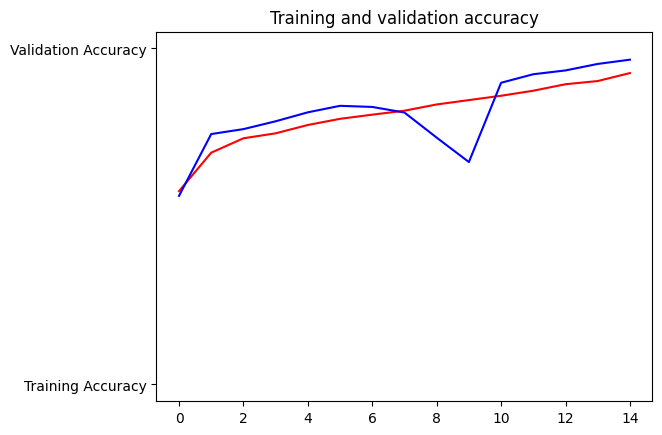

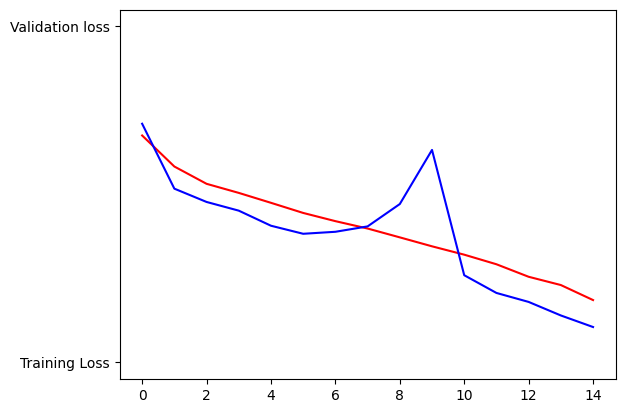

<Figure size 640x480 with 0 Axes>

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation loss")
plt.figure()
